In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
iris = load_iris()
X = iris.data 
y = iris.target 

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

K = 1, Accuracy = 0.9778
K = 2, Accuracy = 0.9778
K = 3, Accuracy = 1.0000
K = 4, Accuracy = 0.9778
K = 5, Accuracy = 1.0000
K = 6, Accuracy = 1.0000
K = 7, Accuracy = 1.0000
K = 8, Accuracy = 1.0000
K = 9, Accuracy = 1.0000
K = 10, Accuracy = 1.0000
K = 11, Accuracy = 1.0000
K = 12, Accuracy = 1.0000
K = 13, Accuracy = 1.0000
K = 14, Accuracy = 1.0000
K = 15, Accuracy = 1.0000
K = 16, Accuracy = 1.0000
K = 17, Accuracy = 1.0000
K = 18, Accuracy = 0.9778
K = 19, Accuracy = 1.0000
K = 20, Accuracy = 1.0000


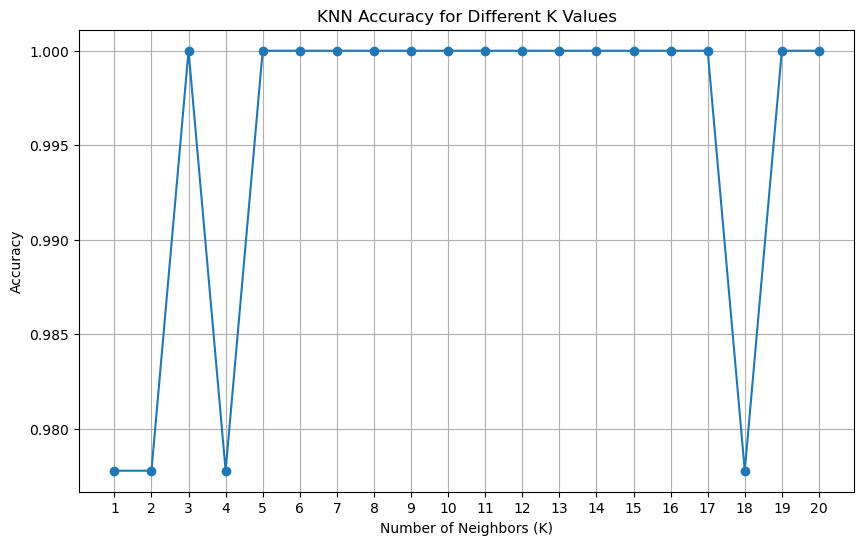

In [6]:
k_values = range(1, 21) 
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    print(f"K = {k}, Accuracy = {accuracy_score(y_test, y_pred):.4f}")

# Plotting the accuracy for different K values to find the best K
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different K Values')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

optimal_k = 7 
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)


Optimal K: 7
Accuracy with optimal K: 1.0000

Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


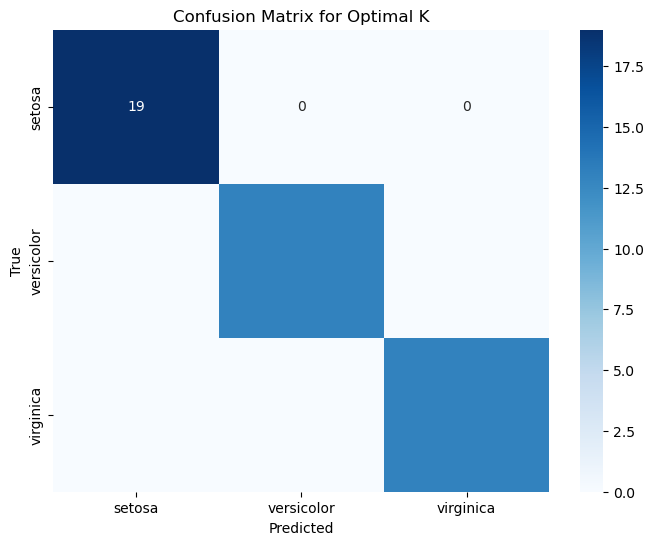

In [7]:
accuracy = accuracy_score(y_test, y_pred_optimal)
conf_matrix = confusion_matrix(y_test, y_pred_optimal)

print(f"\nOptimal K: {optimal_k}")
print(f"Accuracy with optimal K: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Optimal K')
plt.show()

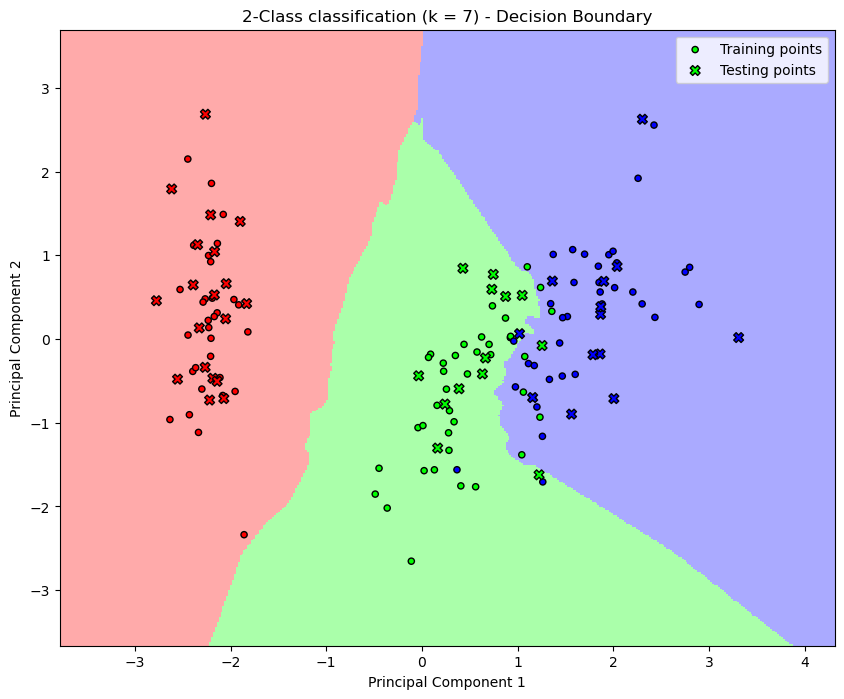

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.3, random_state=42
)


knn_pca = KNeighborsClassifier(n_neighbors=optimal_k)
knn_pca.fit(X_train_pca, y_train_pca)


x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.figure(figsize=(10, 8))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca, cmap=cmap_bold,
            edgecolor='k', s=20, label='Training points')

plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test_pca, cmap=cmap_bold,
            edgecolor='k', s=50, marker='X', label='Testing points')

plt.title(f"2-Class classification (k = {optimal_k}) - Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()